* ML09 ニューラルネットワーク
  * tensorflow をインストールする
  * Google Colab はインストール済み

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.6.5
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
from sklearn.datasets import fetch_openml
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 手書き文字のデータセットをダウンロードして、実験用データを準備 (70000枚のうち7000枚を利用)
mnist_data = fetch_openml('mnist_784', version=1)
_x = np.array(mnist_data['data'].astype(np.float32))
_y = np.array(mnist_data['target'].astype(np.int32))
_, x, _, y = train_test_split(_x, _y, test_size=0.1, random_state=1)

# 特徴量は 0-1 の範囲に正規化、ターゲットは one-hot ベクトル化
x = x / 255
y = np.identity(10)[y]

# データを学習用と検証用に分割
x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.25, random_state=1) # 検証用データに25%を割当て
print(f'x_train:{len(x_train)} x_test:{len(x_test)} y_train:{len(y_train)} y_test:{len(y_test)}')

x_train:5250 x_test:1750 y_train:5250 y_test:1750


mnist_model, accuracy_score: train data : 1.00000  test data : 0.93200
Wall time: 1min 16s


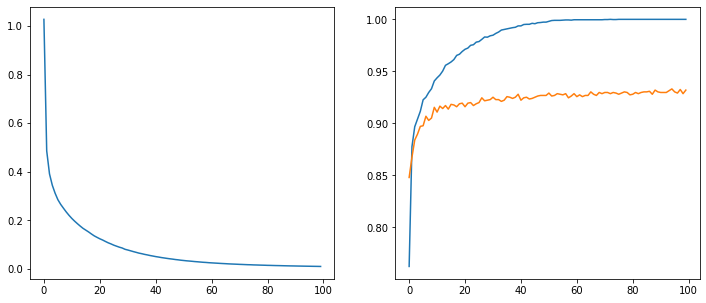

In [8]:
%%time 
# パラメータは元のプログラムのもの
tf.random.set_seed(1) # tensorflow で利用する乱数のシードを設定

# ニューラルネットワークのモデルを作成
mnist_model = tf.keras.models.Sequential(name='mnist_model') # ニューラルネットワークのモデルの箱を用意
mnist_model.add(tf.keras.Input(shape=(784,))) # 784入力の入力層
mnist_model.add(tf.keras.layers.Dense(units=784, activation='relu')) # 784入力のセルを784個用意、活性化関数は ReLU
mnist_model.add(tf.keras.layers.Dense(units=10, activation='softmax')) # セルを10個からなる出力層を用意、活性化関数はソフトマックス

# 学習時の設定を行い、学習を実施 (学習中のlossと正解率の変化をグラフで表示)
mnist_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) # 学習時の損失関数、最適化関数、評価関数を設定
history = mnist_model.fit(x_train, y_train, epochs=100, batch_size=10, verbose=0,   # fit関数で学習を実施
                          validation_data=(x_test, y_test))  # validation用のデータを設定
fig, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].plot(history.history['loss']) # 学習中のlossの変化をグラフで表示
ax[1].plot(history.history['accuracy']) # 学習中の学習用データに対する正解率の変化をグラフで表示
ax[1].plot(history.history['val_accuracy']) # 学習中の検証用データに対する正解率の変化をグラフで表示

# 学習したモデルの性能(正答率)を学習用データと検証用データで評価
train_loss, train_accuracy = mnist_model.evaluate(x_train, y_train, verbose=0)
test_loss, test_accuracy = mnist_model.evaluate(x_test, y_test, verbose=0)
print(f'mnist_model, accuracy_score: train data : {train_accuracy:.5f}  test data : {test_accuracy:.5f}')

mnist_model, accuracy_score: train data : 0.94743  test data : 0.89600
Wall time: 1min 10s


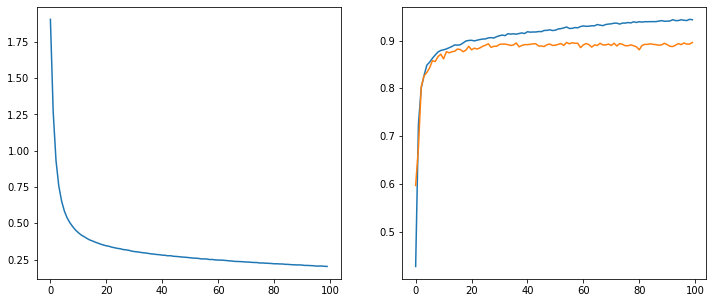

In [10]:
%%time 
# 中間層の活性化関数を sigmoid に変更
tf.random.set_seed(1) # tensorflow で利用する乱数のシードを設定

# ニューラルネットワークのモデルを作成
mnist_model = tf.keras.models.Sequential(name='mnist_model') # ニューラルネットワークのモデルの箱を用意
mnist_model.add(tf.keras.Input(shape=(784,))) # 784入力の入力層
mnist_model.add(tf.keras.layers.Dense(units=784, activation='sigmoid')) # 784入力のセルを784個用意、活性化関数は sigmoid
mnist_model.add(tf.keras.layers.Dense(units=10, activation='softmax')) # セルを10個からなる出力層を用意、活性化関数はソフトマックス

# 学習時の設定を行い、学習を実施 (学習中のlossと正解率の変化をグラフで表示)
mnist_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) # 学習時の損失関数、最適化関数、評価関数を設定
history = mnist_model.fit(x_train, y_train, epochs=100, batch_size=10, verbose=0,   # fit関数で学習を実施
                          validation_data=(x_test, y_test))  # validation用のデータを設定
fig, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].plot(history.history['loss']) # 学習中のlossの変化をグラフで表示
ax[1].plot(history.history['accuracy']) # 学習中の学習用データに対する正解率の変化をグラフで表示
ax[1].plot(history.history['val_accuracy']) # 学習中の検証用データに対する正解率の変化をグラフで表示

# 学習したモデルの性能(正答率)を学習用データと検証用データで評価
train_loss, train_accuracy = mnist_model.evaluate(x_train, y_train, verbose=0)
test_loss, test_accuracy = mnist_model.evaluate(x_test, y_test, verbose=0)
print(f'mnist_model, accuracy_score: train data : {train_accuracy:.5f}  test data : {test_accuracy:.5f}')

mnist_model, accuracy_score: train data : 1.00000  test data : 0.92857
Wall time: 1min 22s


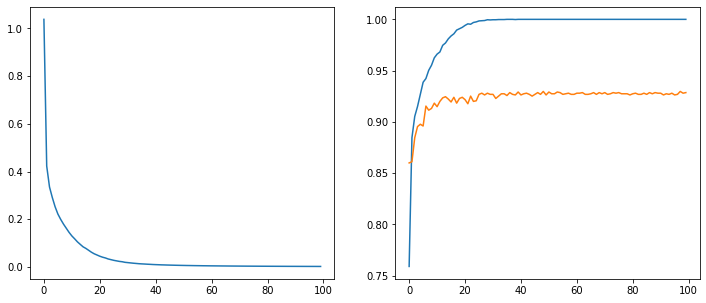

In [14]:
%%time 
# 中間層を1層追加
tf.random.set_seed(1) # tensorflow で利用する乱数のシードを設定

# ニューラルネットワークのモデルを作成
mnist_model = tf.keras.models.Sequential(name='mnist_model') # ニューラルネットワークのモデルの箱を用意
mnist_model.add(tf.keras.Input(shape=(784,))) # 784入力の入力層
mnist_model.add(tf.keras.layers.Dense(units=784, activation='relu')) # 784入力のセルを784個用意、活性化関数は ReLU
mnist_model.add(tf.keras.layers.Dense(units=784, activation='relu')) # 784入力のセルを784個用意、活性化関数は ReLU
mnist_model.add(tf.keras.layers.Dense(units=10, activation='softmax')) # セルを10個からなる出力層を用意、活性化関数はソフトマックス

# 学習時の設定を行い、学習を実施 (学習中のlossと正解率の変化をグラフで表示)
mnist_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) # 学習時の損失関数、最適化関数、評価関数を設定
history = mnist_model.fit(x_train, y_train, epochs=100, batch_size=10, verbose=0,   # fit関数で学習を実施
                          validation_data=(x_test, y_test))  # validation用のデータを設定
fig, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].plot(history.history['loss']) # 学習中のlossの変化をグラフで表示
ax[1].plot(history.history['accuracy']) # 学習中の学習用データに対する正解率の変化をグラフで表示
ax[1].plot(history.history['val_accuracy']) # 学習中の検証用データに対する正解率の変化をグラフで表示

# 学習したモデルの性能(正答率)を学習用データと検証用データで評価
train_loss, train_accuracy = mnist_model.evaluate(x_train, y_train, verbose=0)
test_loss, test_accuracy = mnist_model.evaluate(x_test, y_test, verbose=0)
print(f'mnist_model, accuracy_score: train data : {train_accuracy:.5f}  test data : {test_accuracy:.5f}')

mnist_model, accuracy_score: train data : 1.00000  test data : 0.93429
Wall time: 1min 30s


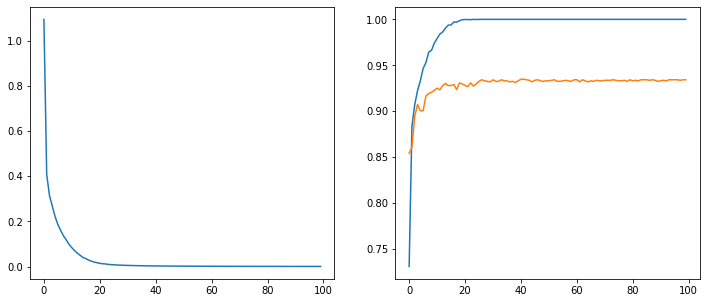

In [15]:
%%time 
# 中間層を2層追加
tf.random.set_seed(1) # tensorflow で利用する乱数のシードを設定

# ニューラルネットワークのモデルを作成
mnist_model = tf.keras.models.Sequential(name='mnist_model') # ニューラルネットワークのモデルの箱を用意
mnist_model.add(tf.keras.Input(shape=(784,))) # 784入力の入力層
mnist_model.add(tf.keras.layers.Dense(units=784, activation='relu')) # 784入力のセルを784個用意、活性化関数は ReLU
mnist_model.add(tf.keras.layers.Dense(units=784, activation='relu')) # 784入力のセルを784個用意、活性化関数は ReLU
mnist_model.add(tf.keras.layers.Dense(units=784, activation='relu')) # 784入力のセルを784個用意、活性化関数は ReLU
mnist_model.add(tf.keras.layers.Dense(units=10, activation='softmax')) # セルを10個からなる出力層を用意、活性化関数はソフトマックス

# 学習時の設定を行い、学習を実施 (学習中のlossと正解率の変化をグラフで表示)
mnist_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) # 学習時の損失関数、最適化関数、評価関数を設定
history = mnist_model.fit(x_train, y_train, epochs=100, batch_size=10, verbose=0,   # fit関数で学習を実施
                          validation_data=(x_test, y_test))  # validation用のデータを設定
fig, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].plot(history.history['loss']) # 学習中のlossの変化をグラフで表示
ax[1].plot(history.history['accuracy']) # 学習中の学習用データに対する正解率の変化をグラフで表示
ax[1].plot(history.history['val_accuracy']) # 学習中の検証用データに対する正解率の変化をグラフで表示

# 学習したモデルの性能(正答率)を学習用データと検証用データで評価
train_loss, train_accuracy = mnist_model.evaluate(x_train, y_train, verbose=0)
test_loss, test_accuracy = mnist_model.evaluate(x_test, y_test, verbose=0)
print(f'mnist_model, accuracy_score: train data : {train_accuracy:.5f}  test data : {test_accuracy:.5f}')

n= 784


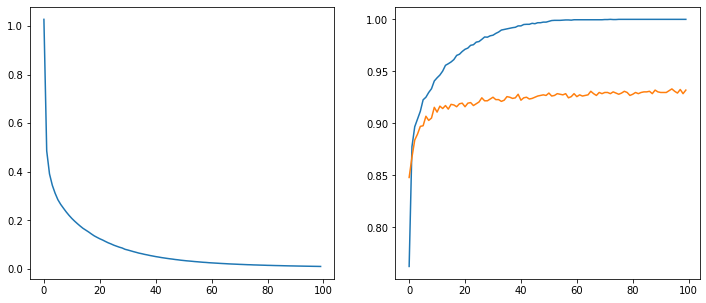

n=784: mnist_model, accuracy_score: train data : 1.00000  test data : 0.93200
n= 1586


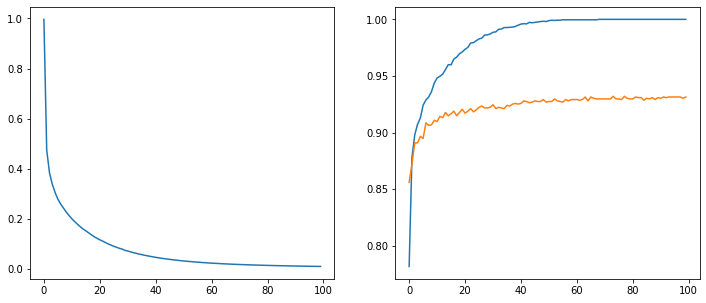

n=1586: mnist_model, accuracy_score: train data : 1.00000  test data : 0.93143
n= 392


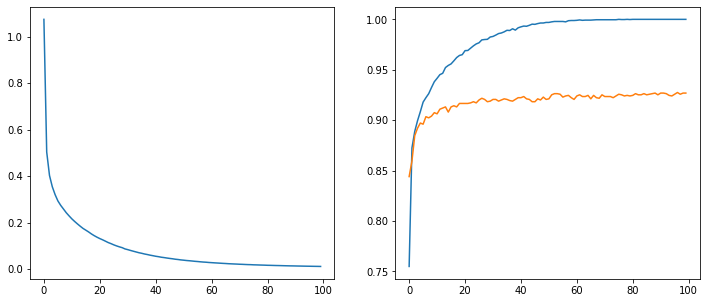

n=392: mnist_model, accuracy_score: train data : 1.00000  test data : 0.92686
n= 196


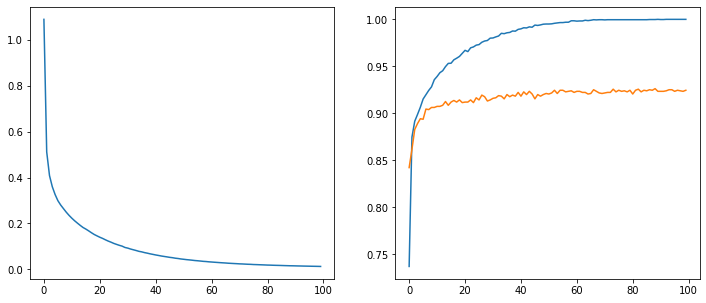

n=196: mnist_model, accuracy_score: train data : 1.00000  test data : 0.92457
n= 98


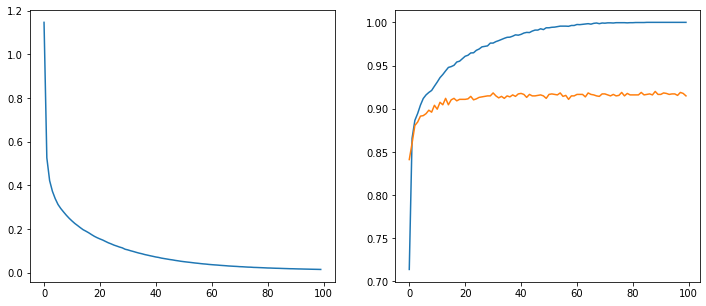

n=98: mnist_model, accuracy_score: train data : 1.00000  test data : 0.91486
n= 10


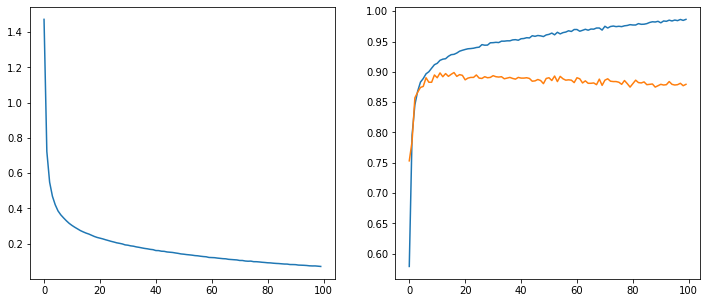

n=10: mnist_model, accuracy_score: train data : 0.98990  test data : 0.87943
Wall time: 7min 9s


In [21]:
%%time 
# 中間層の活性化関数を relu に、中間層のセル数を変えて実験

for n in [784, 1586, 392, 196, 98, 10]:
    tf.random.set_seed(1) # tensorflow で利用する乱数のシードを設定
    # ニューラルネットワークのモデルを作成
    mnist_model = tf.keras.models.Sequential(name='mnist_model') # ニューラルネットワークのモデルの箱を用意
    mnist_model.add(tf.keras.Input(shape=(784,))) # 784入力の入力層
    mnist_model.add(tf.keras.layers.Dense(units=n, activation='relu')) # 784入力のセルを n 個用意、活性化関数は ReLU
    mnist_model.add(tf.keras.layers.Dense(units=10, activation='softmax')) # セルを10個からなる出力層を用意、活性化関数はソフトマックス

    # 学習時の設定を行い、学習を実施 (学習中のlossと正解率の変化をグラフで表示)
    mnist_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) # 学習時の損失関数、最適化関数、評価関数を設定
    history = mnist_model.fit(x_train, y_train, epochs=100, batch_size=10, verbose=0,   # fit関数で学習を実施
                            validation_data=(x_test, y_test))  # validation用のデータを設定
    fig, ax = plt.subplots(1,2,figsize=(12,5))
    print('n=', n)
    ax[0].plot(history.history['loss']) # 学習中のlossの変化をグラフで表示
    ax[1].plot(history.history['accuracy']) # 学習中の学習用データに対する正解率の変化をグラフで表示
    ax[1].plot(history.history['val_accuracy']) # 学習中の検証用データに対する正解率の変化をグラフで表示
    plt.show()

    # 学習したモデルの性能(正答率)を学習用データと検証用データで評価
    train_loss, train_accuracy = mnist_model.evaluate(x_train, y_train, verbose=0)
    test_loss, test_accuracy = mnist_model.evaluate(x_test, y_test, verbose=0)
    print(f'n={n}: mnist_model, accuracy_score: train data : {train_accuracy:.5f}  test data : {test_accuracy:.5f}')

In [16]:
%%time 
# パラメータは元のプログラムのもの、10回試行
tf.random.set_seed(1) # tensorflow で利用する乱数のシードを設定

for i in range(10):
    # ニューラルネットワークのモデルを作成
    mnist_model = tf.keras.models.Sequential(name='mnist_model') # ニューラルネットワークのモデルの箱を用意
    mnist_model.add(tf.keras.Input(shape=(784,))) # 784入力の入力層
    mnist_model.add(tf.keras.layers.Dense(units=784, activation='relu')) # 784入力のセルを784個用意、活性化関数は ReLU
    mnist_model.add(tf.keras.layers.Dense(units=10, activation='softmax')) # セルを10個からなる出力層を用意、活性化関数はソフトマックス

    # 学習時の設定を行い、学習を実施 (学習中のlossと正解率の変化をグラフで表示)
    mnist_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) # 学習時の損失関数、最適化関数、評価関数を設定
    history = mnist_model.fit(x_train, y_train, epochs=100, batch_size=10, verbose=0,   # fit関数で学習を実施
                            validation_data=(x_test, y_test))  # validation用のデータを設定

    # 学習したモデルの性能(正答率)を学習用データと検証用データで評価
    train_loss, train_accuracy = mnist_model.evaluate(x_train, y_train, verbose=0)
    test_loss, test_accuracy = mnist_model.evaluate(x_test, y_test, verbose=0)
    print(f'{i+1}: mnist_model, accuracy_score: train data : {train_accuracy:.5f}  test data : {test_accuracy:.5f}')

1: mnist_model, accuracy_score: train data : 1.00000  test data : 0.93200
2: mnist_model, accuracy_score: train data : 1.00000  test data : 0.92857
3: mnist_model, accuracy_score: train data : 1.00000  test data : 0.92857
4: mnist_model, accuracy_score: train data : 1.00000  test data : 0.92629
5: mnist_model, accuracy_score: train data : 1.00000  test data : 0.93029
6: mnist_model, accuracy_score: train data : 1.00000  test data : 0.92686
7: mnist_model, accuracy_score: train data : 1.00000  test data : 0.92914
8: mnist_model, accuracy_score: train data : 1.00000  test data : 0.92971
9: mnist_model, accuracy_score: train data : 1.00000  test data : 0.93200
10: mnist_model, accuracy_score: train data : 1.00000  test data : 0.93086
Wall time: 12min 26s


In [17]:
import statistics
a = [0.93200, 0.92857, 0.92857, 0.92629, 0.93029, 0.92686, 0.92914, 0.92971, 0.93200, 0.93086]
print(statistics.mean(a))
print(statistics.pvariance(a))
print(statistics.pstdev(a))

0.9294290000000001
3.4100490000000756e-06
0.0018466317987081442


In [19]:
%%time 
# バッチサイズを変更
for _batch_size in [1, 5, 10, 20, 50]:
    tf.random.set_seed(1) # tensorflow で利用する乱数のシードを設定
    # ニューラルネットワークのモデルを作成
    mnist_model = tf.keras.models.Sequential(name='mnist_model') # ニューラルネットワークのモデルの箱を用意
    mnist_model.add(tf.keras.Input(shape=(784,))) # 784入力の入力層
    mnist_model.add(tf.keras.layers.Dense(units=784, activation='relu')) # 784入力のセルを784個用意、活性化関数は ReLU
    mnist_model.add(tf.keras.layers.Dense(units=10, activation='softmax')) # セルを10個からなる出力層を用意、活性化関数はソフトマックス

    # 学習時の設定を行い、学習を実施 (学習中のlossと正解率の変化をグラフで表示)
    mnist_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) # 学習時の損失関数、最適化関数、評価関数を設定
    history = mnist_model.fit(x_train, y_train, epochs=100, batch_size=_batch_size, verbose=0,   # fit関数で学習を実施
                            validation_data=(x_test, y_test))  # validation用のデータを設定

    # 学習したモデルの性能(正答率)を学習用データと検証用データで評価
    train_loss, train_accuracy = mnist_model.evaluate(x_train, y_train, verbose=0)
    test_loss, test_accuracy = mnist_model.evaluate(x_test, y_test, verbose=0)
    print(f'batch_size {_batch_size}: mnist_model, accuracy_score: train data : {train_accuracy:.5f}  test data : {test_accuracy:.5f}')

batch_size 1: mnist_model, accuracy_score: train data : 1.00000  test data : 0.94114
batch_size 5: mnist_model, accuracy_score: train data : 1.00000  test data : 0.93371
batch_size 10: mnist_model, accuracy_score: train data : 1.00000  test data : 0.93200
batch_size 20: mnist_model, accuracy_score: train data : 0.99886  test data : 0.92800
batch_size 50: mnist_model, accuracy_score: train data : 0.97390  test data : 0.91943
Wall time: 15min 1s
